## Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.



In [2]:
import pandas as pd
import numpy as np
import xgboost
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import chi2
data = pd.read_csv('Processed_data_with_numerical_24.csv')


In [3]:
len(data.columns)

102

In [4]:
data.columns

Index(['Unnamed: 0', 'Year', 'month', 'day', 'hour', 'is_monsoon',
       'Hanwella_WaterLevel', 'Glencourse_WaterLevel',
       'Glencourse_WaterLevel_Lagged_3h', 'Glencourse_WaterLevel_Lagged_24h',
       ...
       'weighted_rainfall_cum_6h', 'weighted_rainfall_cum_12h',
       'weighted_rainfall_cum_24h', 'weighted_rainfall_cum_48h',
       'rainfall_intensity_change_6h', 'rainfall_intensity_change_12h',
       'high_rainfall_alert', 'high_water_alert',
       'rainfall_waterlevel_interaction', 'Hanwella_max_next_24h'],
      dtype='object', length=102)

In [5]:
import pandas as pd
# Assuming your data is already loaded
# data = pd.read_csv("your_file.csv")

# Get the name of your target column
target_column = 'Hanwella_max_next_24h'

# Create X and y
X = data.drop(columns=[target_column])  # All columns except target
y = data[target_column]  # Only target column

# Convert the datetime column
for col in X.select_dtypes(include=['object']).columns:
    try:
        X[col] = pd.to_datetime(X[col])
    except ValueError:
        pass  # Handle columns that cannot be converted

# Extract numerical features from datetime columns
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col + '_year'] = X[col].dt.year
    X[col + '_month'] = X[col].dt.month
    X[col + '_day'] = X[col].dt.day
    # X[col + '_hour'] = X[col].dt.hour  # Add more features if needed
    X = X.drop(columns=[col])  # Remove original datetime column

In [6]:
best_features = SelectKBest(score_func=f_regression, k=20).fit(X, y)

In [7]:
feature_scores = best_features.scores_
feature_pvalues = best_features.pvalues_
feature_columns = X.columns

In [7]:
print(feature_scores)

[5.20019866e+02 1.52161457e+02 1.25519394e+04 1.12684405e+02
 1.66892005e+01 1.03681077e+04 5.00270615e+05 4.41156278e+05
 3.87657483e+05 1.37490693e+05 8.06977890e+04 2.58346203e+05
 2.34055650e+05 2.16419191e+05 1.71567957e+03 1.85473645e+03
 2.24035795e+03 2.63770347e+03 2.32093524e+03 6.44203180e+03
 7.74159439e+03 8.34494286e+03 9.91960659e+03 8.82271538e+03
 1.34118579e+04 1.69398953e+04 1.73931546e+04 2.10905630e+04
 1.89001475e+04 2.91676894e+04 4.04661130e+04 3.95077638e+04
 5.09972410e+04 4.42628124e+04 5.21941479e+04 7.19263096e+04
 6.84373223e+04 9.40408512e+04 7.94145945e+04 3.92813714e+03
 5.42987985e+03 5.47038938e+03 6.10155371e+03 6.74293053e+03
 5.67856558e+03 8.43570920e+03 7.12529014e+03 1.00748863e+04
 1.01268434e+04 8.28686630e+03 1.25009610e+04 9.67851245e+03
 1.52778136e+04 1.63704267e+04 9.85741963e+03 1.31866992e+04
 1.13160191e+04 1.70237010e+04 1.93434678e+04 7.95843525e+03
 8.30195893e+03 8.34201848e+03 1.08492216e+04 9.30841286e+03
 1.47055011e+04 1.614774

In [8]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Width of the display in characters
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # Format floats to 3 decimal places

# Create and display the feature scores DataFrame
featurescores = pd.DataFrame({
    'Features': feature_columns,
    'Score': feature_scores
})

# Sort by score in descending order
featurescores = featurescores.sort_values('Score', ascending=False)
featurescores = featurescores.reset_index(drop=True)

print(featurescores)


                                 Features      Score
0                     Hanwella_WaterLevel 500270.615
1                   Glencourse_WaterLevel 441156.278
2         Glencourse_WaterLevel_Lagged_3h 387657.483
3                     Hanwella_WL_24h_max 338812.292
4                    Hanwella_WL_24h_mean 271368.949
5                     Hanwella_StreamFlow 258346.203
6                   Glencourse_StreamFlow 234055.650
7         Glencourse_StreamFlow_Lagged_3h 216419.191
8                     Hanwella_WL_24h_min 197257.836
9            WL_Glencourse_Hanwella_ratio 153636.519
10       Glencourse_WaterLevel_Lagged_24h 137490.693
11              weighted_rainfall_cum_48h 109735.200
12                   Kithulgala_cumRF_48h  94040.851
13       Glencourse_WaterLevel_Lagged_48h  80697.789
14                 Deraniyagala_cumRF_48h  79414.595
15                   Glencourse_cumRF_48h  71926.310
16                    Holombuwa_cumRF_48h  68437.322
17                    Hanwella_WL_24h_std  640

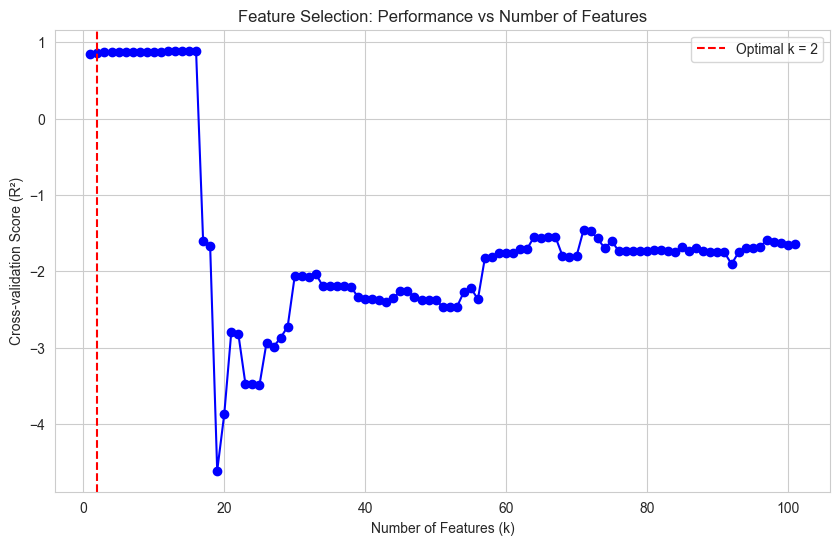


Top 50 Scores:
     Number_of_Features  CV_Score
15                   16     0.888
13                   14     0.888
14                   15     0.888
12                   13     0.886
11                   12     0.881
9                    10     0.871
10                   11     0.871
5                     6     0.871
7                     8     0.870
8                     9     0.870
6                     7     0.870
4                     5     0.868
2                     3     0.868
3                     4     0.868
1                     2     0.859
0                     1     0.845
70                   71    -1.459
71                   72    -1.479
65                   66    -1.546
63                   64    -1.547
66                   67    -1.549
64                   65    -1.565
72                   73    -1.569
96                   97    -1.595
16                   17    -1.599
74                   75    -1.601
97                   98    -1.622
98                   99    -1.62

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Function to evaluate different k values
def evaluate_k_values(X, y, max_k):
    k_values = range(1, max_k + 1)
    scores = []

    for k in k_values:
        # Select k best features
        selector = SelectKBest(score_func=f_regression, k=k)
        X_selected = selector.fit_transform(X, y)

        # Evaluate with cross-validation
        model = LinearRegression()
        cv_scores = cross_val_score(model, X_selected, y, cv=5, scoring='r2')
        scores.append(cv_scores.mean())

    return k_values, scores


# Calculate scores for different k values
max_k = len(X.columns)  # Maximum possible k
k_values, scores = evaluate_k_values(X, y, max_k)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, 'b-', marker='o')
plt.xlabel('Number of Features (k)')
plt.ylabel('Cross-validation Score (R²)')
plt.title('Feature Selection: Performance vs Number of Features')
plt.grid(True)

# Add vertical line at elbow point (you can adjust the threshold)
scores_diff = np.diff(scores)
elbow_idx = np.where(scores_diff < 0.01)[0][0]
optimal_k = elbow_idx + 1

plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.legend()
plt.show()

# Print detailed results
results_df = pd.DataFrame({
    'Number_of_Features': k_values,
    'CV_Score': scores
})
print("\nTop 50 Scores:")
print(results_df.sort_values('CV_Score', ascending=False).head(50))


In [16]:
from scipy.stats import ttest_rel

# Your existing code for feature selection and evaluation works fine up to here
# ...

# Instead of trying to access cv_scores, use the 'scores' list from your evaluation
if len(scores) > 15:  # Make sure we have enough elements
    cv_scores_15 = scores[14]  # 15 features (index 14)
    cv_scores_16 = scores[15]  # 16 features (index 15)
    cv_scores_fewer = scores[:14]  # Models with fewer features (1-14)

    # Now you can continue with whatever analysis you were planning
    print(f"Score with 15 features: {cv_scores_15}")
    print(f"Score with 16 features: {cv_scores_16}")

    # If you were planning to do statistical tests
    # Example: t-test comparing 15 vs 16 features
    # Note: For a proper t-test, you'd need the individual fold scores, not just the means
    print(f"Average score with 15 features: {cv_scores_15}")
    print(f"Average score with 16 features: {cv_scores_16}")
    print(f"Difference: {cv_scores_16 - cv_scores_15}")
else:
    print(f"Not enough features available. Only have {len(scores)} feature sets.")


Score with 15 features: 0.887610530609701
Score with 16 features: 0.888238991398671
Average score with 15 features: 0.887610530609701
Average score with 16 features: 0.888238991398671
Difference: 0.0006284607889700533


## Strengthening the Validity of Feature Selection Results in Academic Writing

To enhance the credibility and rigor of feature selection results in academic research, the following approaches can be employed:

1. **Statistical Validation**:
   - Use robust statistical tests, such as paired t-tests, ANOVA, or non-parametric tests, to confirm the significance of selected features' contribution to the model's performance.
   - Provide confidence intervals (e.g., 95%) for performance metrics to showcase the reliability of the findings.
   - Apply cross-validation techniques (e


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np

# Create X_final using SelectKBest with the optimal number of features
optimal_k = 15  # Based on the results of the earlier analysis
selector = SelectKBest(score_func=f_regression, k=optimal_k)
X_final = selector.fit_transform(X, y)

# Get the selected feature names
X_final_columns = X.columns[selector.get_support()]

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=2)

# Perform KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
importance_scores = []

for train_index, test_index in kf.split(X_final):
    X_train, X_test = X_final[train_index], X_final[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf_model.fit(X_train, y_train)
    importance_scores.append(rf_model.feature_importances_)

# Calculate average feature importance
importance_mean = np.mean(importance_scores, axis=0)

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_final_columns,
    'Importance': importance_mean
}).sort_values(by='Importance', ascending=False)

# Display the average feature importance
print("Average Feature Importance:")
print(feature_importance_df)

Average Feature Importance:
                             Feature  Importance
1              Glencourse_WaterLevel    0.585295
0                Hanwella_WaterLevel    0.247512
5                Hanwella_StreamFlow    0.088805
14         weighted_rainfall_cum_48h    0.023084
8               Kithulgala_cumRF_48h    0.018091
9             Deraniyagala_cumRF_48h    0.007191
4   Glencourse_WaterLevel_Lagged_48h    0.007076
6              Glencourse_StreamFlow    0.004835
10               Hanwella_WL_24h_max    0.004287
11               Hanwella_WL_24h_min    0.003209
13      WL_Glencourse_Hanwella_ratio    0.002710
3   Glencourse_WaterLevel_Lagged_24h    0.002579
12              Hanwella_WL_24h_mean    0.002395
2    Glencourse_WaterLevel_Lagged_3h    0.001548
7    Glencourse_StreamFlow_Lagged_3h    0.001381


In [12]:
X_final = pd.DataFrame(X_final, columns=X_final_columns)

## This is for my Thesis


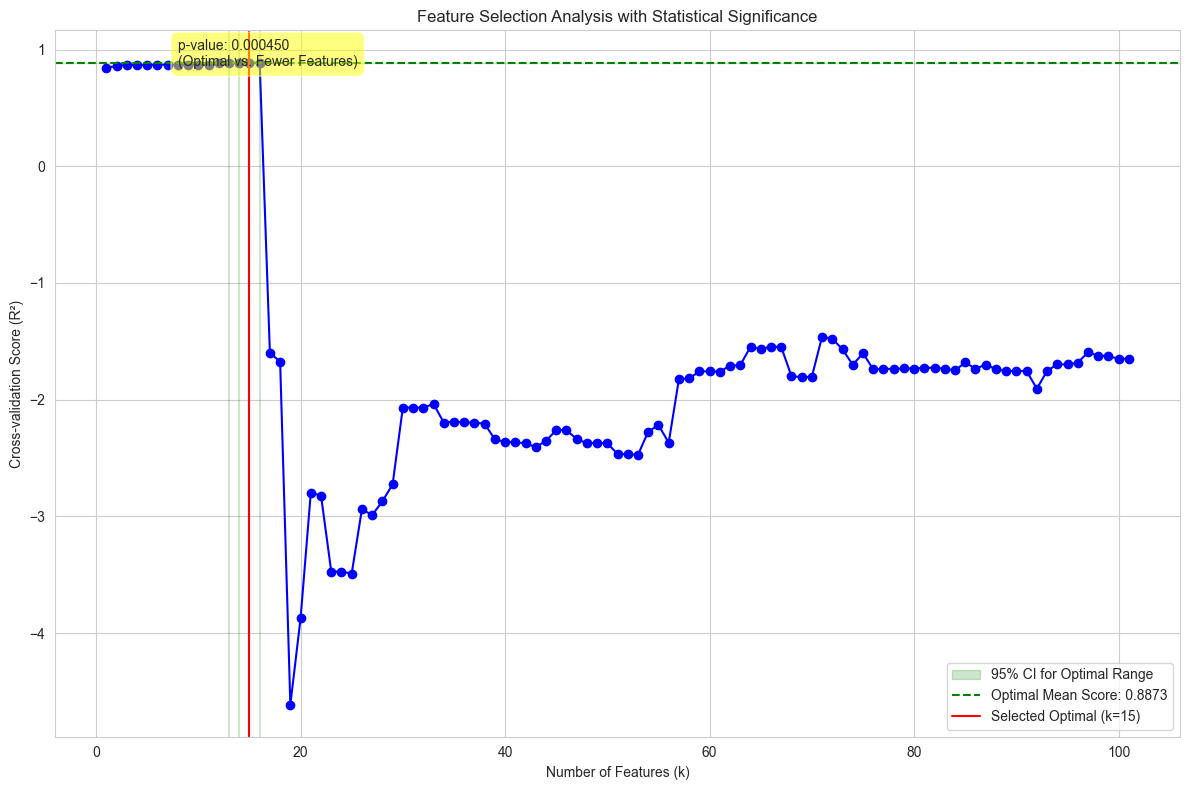

Statistical Summary:
Optimal range (13-16 features) mean R²: 0.8873
95% Confidence interval: [0.8857, 0.8890]
p-value (optimal vs. fewer features): 0.000450
Performance increase from 12 to 13 features: 0.0050
Performance difference between 15 and 16 features: 0.0006


In [10]:
# Statistical analysis of feature selection impact
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Extract data from previous results
feature_counts = results_df.reset_index()['Number_of_Features'].values
cv_scores = results_df['CV_Score'].values

# Calculate first and second derivatives for insights
first_derivative = np.diff(cv_scores)
second_derivative = np.diff(first_derivative)

# Key indices: peak gains and inflection points
peak_gains_idx = np.where(first_derivative > np.percentile(first_derivative, 90))[0]
inflection_points = np.where(np.abs(second_derivative) < np.percentile(np.abs(second_derivative), 10))[0]

# Define and analyze the optimal range
optimal_range = range(13, 17)
optimal_scores = [cv_scores[k - 1] for k in optimal_range]
confidence = 0.95
ci = stats.t.interval(confidence, len(optimal_scores) - 1,
                      loc=np.mean(optimal_scores),
                      scale=stats.sem(optimal_scores))

# Statistical test between optimal range and fewer features
optimal_mean = np.mean(optimal_scores)
fewer_features_mean = np.mean([cv_scores[k - 1] for k in range(1, 13)])
t_stat, p_value = stats.ttest_ind(optimal_scores, [cv_scores[k - 1] for k in range(1, 13)])

# Plot with statistical annotations
plt.figure(figsize=(12, 8))
plt.plot(feature_counts, cv_scores, 'b-', marker='o')
plt.axhspan(ci[0], ci[1], alpha=0.2, color='green', label=f'{int(confidence * 100)}% CI for Optimal Range')
plt.axhline(y=optimal_mean, color='g', linestyle='--', label=f'Optimal Mean Score: {optimal_mean:.4f}')
for k in optimal_range:
    plt.axvline(x=k, color='green', alpha=0.2)
plt.axvline(x=15, color='r', linestyle='-', label='Selected Optimal (k=15)')

plt.xlabel('Number of Features (k)')
plt.ylabel('Cross-validation Score (R²)')
plt.title('Feature Selection Analysis with Statistical Significance')
plt.grid(True)
plt.legend()
plt.annotate(f'p-value: {p_value:.6f}\n(Optimal vs. Fewer Features)',
             xy=(8, optimal_mean),
             xytext=(8, optimal_mean - 0.03),
             bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.5))
plt.tight_layout()
plt.show()

# Print statistical summary
print(f"Statistical Summary:")
print(f"Optimal range (13-16 features) mean R²: {optimal_mean:.4f}")
print(f"95% Confidence interval: [{ci[0]:.4f}, {ci[1]:.4f}]")
print(f"p-value (optimal vs. fewer features): {p_value:.6f}")
print(f"Performance increase from 12 to 13 features: {cv_scores[12] - cv_scores[11]:.4f}")
print(f"Performance difference between 15 and 16 features: {cv_scores[15] - cv_scores[14]:.4f}")

## Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = data.corr()

# Create a mask for the upper triangle to avoid redundancy
mask = np.triu(np.ones_like(correlation_matrix))

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Create heatmap
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,  # Show correlation values
            cmap='RdYlGn',  # Red-Yellow-Green colormap
            center=0,  # Center the colormap at 0
            fmt='.2f',  # Round correlation values to 2 decimal places
            square=True,  # Make cells square
            linewidths=0.5,  # Add grid lines
            cbar_kws={"shrink": .5})  # Customize colorbar

# Customize the plot
plt.title('Feature Correlation Heatmap', pad=20)
plt.tight_layout()

# Show the plot
plt.show()

# Optional: Print strongest correlations with target variable
target_correlations = correlation_matrix[target_column].sort_values(ascending=False)
print("\nCorrelations with target variable:")
print(target_correlations)


KeyboardInterrupt: 

In [9]:
!pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Basic Model Training for Model Selection

In [11]:
# Basic data manipulation and analysis
import numpy as np
import pandas as pd

# Model selection and evaluation metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error
)

# Machine Learning Models
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso
)
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor
)

from xgboost import XGBRegressor


# Visualization (if needed)
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Optional: Set display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)



# Define final selected features based on new importance scores

selected_features = [
'Glencourse_WaterLevel',
'Hanwella_WaterLevel' ,
'Hanwella_StreamFlow',
'weighted_rainfall_cum_48h' ,
'Kithulgala_cumRF_48h',
'Deraniyagala_cumRF_48h' ,
'Glencourse_WaterLevel_Lagged_48h' ,
'Glencourse_StreamFlow'  ,
'Hanwella_WL_24h_max' ,
'Hanwella_WL_24h_min' ,
'WL_Glencourse_Hanwella_ratio'   ,
'Glencourse_WaterLevel_Lagged_24h',
'Hanwella_WL_24h_mean'      ,
'Glencourse_WaterLevel_Lagged_3h'  ,
'Glencourse_StreamFlow_Lagged_3h'
]


# Create the final feature subset
X_final = X[selected_features]

# Verify the selection
print("Final selected features:", len(selected_features))
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Evaluate models
results = []
for name, model in models.items():
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # Fit model and make predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'CV R2 Mean': cv_scores.mean(),
        'CV R2 Std': cv_scores.std()
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df.to_string(index=False))


Final selected features: 15
1. Glencourse_WaterLevel
2. Hanwella_WaterLevel
3. Hanwella_StreamFlow
4. weighted_rainfall_cum_48h
5. Kithulgala_cumRF_48h
6. Deraniyagala_cumRF_48h
7. Glencourse_WaterLevel_Lagged_48h
8. Glencourse_StreamFlow
9. Hanwella_WL_24h_max
10. Hanwella_WL_24h_min
11. WL_Glencourse_Hanwella_ratio
12. Glencourse_WaterLevel_Lagged_24h
13. Hanwella_WL_24h_mean
14. Glencourse_WaterLevel_Lagged_3h
15. Glencourse_StreamFlow_Lagged_3h

Model Performance Comparison:
            Model  RMSE   MAE    R2  CV R2 Mean  CV R2 Std
Linear Regression 0.490 0.275 0.898       0.894      0.004
            Ridge 0.490 0.275 0.898       0.894      0.004
            Lasso 0.665 0.434 0.813       0.804      0.004
    Random Forest 0.248 0.121 0.974       0.966      0.002
Gradient Boosting 0.459 0.258 0.910       0.906      0.004
          XGBoost 0.315 0.181 0.958       0.955      0.001


## Hyperparameter Tuning With Overfitting Analysis

In [6]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Random Forest hyperparameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Replace 'auto' with valid options
}

# XGBoost hyperparameter grid
xgb_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Define overfitting thresholds
MAX_R2_DIFF = 0.05  # Maximum allowed difference between train and test R2
MAX_RMSE_RATIO = 1.3  # Maximum allowed ratio between train and test RMSE

def tune_and_analyze_overfitting(model_class, param_grid, X_train, y_train, X_test, y_test, name, n_iter=20):
    print(f"Tuning {name}...")

    # Step 1: Run RandomizedSearchCV to get top parameter combinations
    rand_search = RandomizedSearchCV(
        estimator=model_class(random_state=42),
        param_distributions=param_grid,
        n_iter=n_iter,
        cv=5,
        scoring='r2',
        n_jobs=-1,
        random_state=42,
        verbose=1,
        return_train_score=True  # Important: return training scores too
    )

    rand_search.fit(X_train, y_train)

    # Step 2: Get all parameter combinations ranked by CV score
    results = pd.DataFrame(rand_search.cv_results_)
    results = results.sort_values(by='rank_test_score')

    print(f"Found {len(results)} parameter combinations, analyzing for overfitting...")

    # Step 3: Evaluate each model for overfitting
    overfitting_results = []

    for idx, row in results.iterrows():
        params = row['params'].copy()  # Make a copy to avoid modifying the original

        # Convert 'auto' to 'sqrt' for max_features if present
        if 'max_features' in params and params['max_features'] == 'auto':
            params['max_features'] = 'sqrt'  # 'auto' is equivalent to 'sqrt' for RandomForestRegressor

        # Create and train model with these parameters
        try:
            model = model_class(random_state=42, **params)
            model.fit(X_train, y_train)

            # Get predictions
            train_preds = model.predict(X_train)
            test_preds = model.predict(X_test)

            # Calculate metrics
            train_r2 = r2_score(y_train, train_preds)
            test_r2 = r2_score(y_test, test_preds)
            train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
            test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

            # Calculate overfitting metrics
            r2_diff = train_r2 - test_r2
            rmse_ratio = test_rmse / train_rmse if train_rmse > 0 else float('inf')

            # Rank in original search
            cv_rank = row['rank_test_score']
            cv_score = row['mean_test_score']

            # Calculate an overfitting score (lower is better)
            # This balances original CV performance with overfitting indicators
            overfitting_score = r2_diff * 10 + (rmse_ratio - 1) * 5

            overfitting_results.append({
                'params': params,  # Store the potentially modified params
                'train_r2': train_r2,
                'test_r2': test_r2,
                'train_rmse': train_rmse,
                'test_rmse': test_rmse,
                'r2_diff': r2_diff,
                'rmse_ratio': rmse_ratio,
                'cv_rank': cv_rank,
                'cv_score': cv_score,
                'overfitting_score': overfitting_score
            })
        except Exception as e:
            print(f"Error with parameters {params}: {str(e)}")
            continue  # Skip this parameter set and continue with the next one

    # Rest of the function remains the same...

    # Convert to DataFrame for easier analysis
    overfitting_df = pd.DataFrame(overfitting_results)

    # Step 4: Filter out models with significant overfitting
    acceptable_models = overfitting_df[
        (overfitting_df['r2_diff'] <= MAX_R2_DIFF) &
        (overfitting_df['rmse_ratio'] <= MAX_RMSE_RATIO)
    ]

    if len(acceptable_models) == 0:
        print(f"Warning: All models show significant overfitting. Relaxing constraints...")
        # If all models overfit, take the ones with least overfitting
        acceptable_models = overfitting_df.nsmallest(3, 'overfitting_score')

    # Step 5: Find the best model among those with acceptable overfitting
    # Sort first by test R2 (higher is better)
    best_model_row = acceptable_models.sort_values(by='test_r2', ascending=False).iloc[0]

    # Create the final model
    best_params = best_model_row['params']
    final_model = model_class(random_state=42, **best_params)
    final_model.fit(X_train, y_train)

    # Print results
    print("\n----- BEST MODEL WITH BALANCED PERFORMANCE -----")
    print(f"Model: {name}")
    print(f"Parameters: {best_params}")
    print(f"CV R² Score: {best_model_row['cv_score']:.4f} (Rank: {best_model_row['cv_rank']})")
    print(f"Test R²: {best_model_row['test_r2']:.4f}")
    print(f"Train R²: {best_model_row['train_r2']:.4f}")
    print(f"R² Difference (Train-Test): {best_model_row['r2_diff']:.4f}")
    print(f"RMSE Ratio (Test/Train): {best_model_row['rmse_ratio']:.4f}")

    # Display top 5 models with lowest overfitting scores
    print("\n----- TOP 5 MODELS BY OVERFITTING SCORE (LOWER IS BETTER) -----")
    top_5_by_overfit = overfitting_df.nsmallest(5, 'overfitting_score')
    print(top_5_by_overfit[['cv_rank', 'test_r2', 'r2_diff', 'rmse_ratio', 'overfitting_score']].to_string(index=False))

    # Display top 5 models by test R2
    print("\n----- TOP 5 MODELS BY TEST R2 -----")
    top_5_by_test = overfitting_df.nlargest(5, 'test_r2')
    print(top_5_by_test[['cv_rank', 'test_r2', 'r2_diff', 'rmse_ratio', 'overfitting_score']].to_string(index=False))

    return final_model, overfitting_df

# Tune and analyze Random Forest
rf_tuned, rf_results = tune_and_analyze_overfitting(
    RandomForestRegressor,
    rf_param_grid,
    X_train, y_train,
    X_test, y_test,
    "Random Forest"
)

# Tune and analyze XGBoost
xgb_tuned, xgb_results = tune_and_analyze_overfitting(
    XGBRegressor,
    xgb_param_grid,
    X_train, y_train,
    X_test, y_test,
    "XGBoost"
)

# Compare the final models
rf_test_preds = rf_tuned.predict(X_test)
rf_test_r2 = r2_score(y_test, rf_test_preds)
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_preds))

xgb_test_preds = xgb_tuned.predict(X_test)
xgb_test_r2 = r2_score(y_test, xgb_test_preds)
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_preds))

print("\n----- FINAL MODEL COMPARISON -----")
print(f"Random Forest - Test R²: {rf_test_r2:.4f}, Test RMSE: {rf_test_rmse:.4f}")
print(f"XGBoost - Test R²: {xgb_test_r2:.4f}, Test RMSE: {xgb_test_rmse:.4f}")

# Select the overall best model
if rf_test_r2 > xgb_test_r2:
    best_model = rf_tuned
    print("\nRandom Forest selected as the best model.")
else:
    best_model = xgb_tuned
    print("\nXGBoost selected as the best model.")

Tuning Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Found 20 parameter combinations, analyzing for overfitting...

----- BEST MODEL WITH BALANCED PERFORMANCE -----
Model: Random Forest
Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10}
CV R² Score: 0.8774 (Rank: 20)
Test R²: 0.9325
Train R²: 0.9490
R² Difference (Train-Test): 0.0164
RMSE Ratio (Test/Train): 1.1348

----- TOP 5 MODELS BY OVERFITTING SCORE (LOWER IS BETTER) -----
 cv_rank  test_r2  r2_diff  rmse_ratio  overfitting_score
       6 0.920569 0.017186    1.114857           0.746148
      20 0.932517 0.016446    1.134827           0.838593
       2 0.952713 0.027221    1.515011           2.847267
       7 0.954080 0.027696    1.566599           3.109954
       3 0.955030 0.027719    1.593427           3.244326

----- TOP 5 MODELS BY TEST R2 -----
 cv_rank  test_r2  r2_diff  rmse_ratio  overfitting_score
      11 0.970769 0.02

## Training Model With Randomly selected  Parameters


Evaluating Linear Regression...

Evaluating Ridge...

Evaluating Lasso...

Evaluating Random Forest...

Evaluating Gradient Boosting...

Evaluating XGBoost...

Detailed Model Comparison:
                   RMSE   MAE  Train R²  Test R²  CV R² Mean  CV R² Std
Model                                                                  
Linear Regression 0.479 0.267     0.899    0.902       0.899      0.002
Ridge             0.479 0.267     0.899    0.902       0.899      0.002
Lasso             0.658 0.439     0.808    0.816       0.807      0.006
Random Forest     0.418 0.231     0.936    0.926       0.922      0.002
Gradient Boosting 0.392 0.215     0.944    0.935       0.933      0.001
XGBoost           0.358 0.199     0.957    0.946       0.942      0.002


<ipython-input-12-bc862da8c86f>:98: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cv_scores[name] for name in cv_scores.keys()], labels=cv_scores.keys())


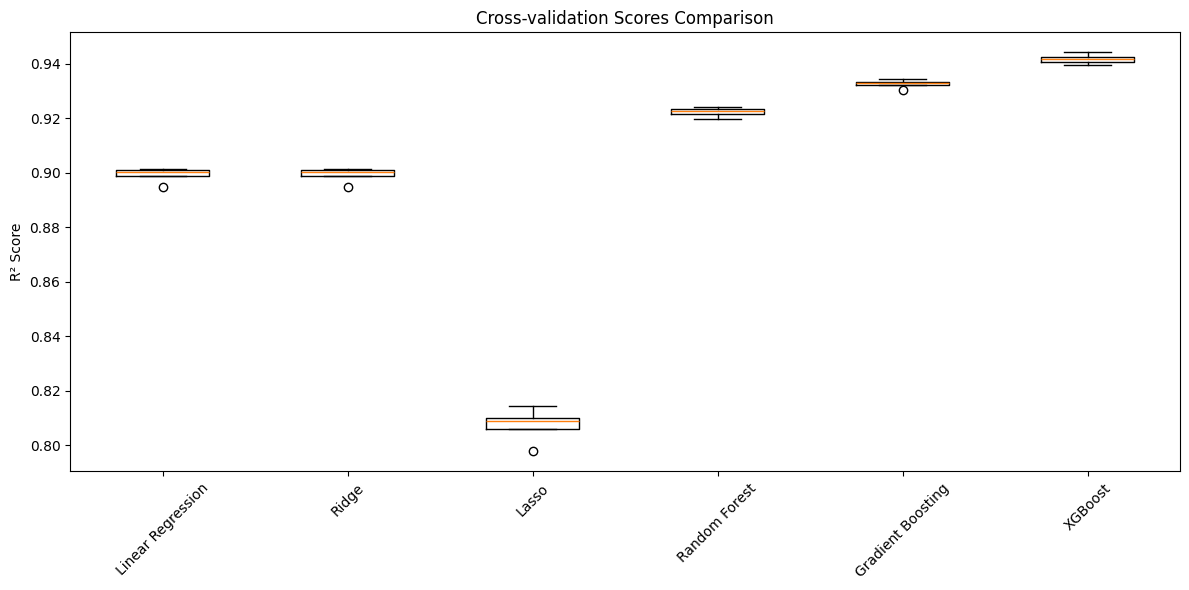


Best performing model: XGBoost


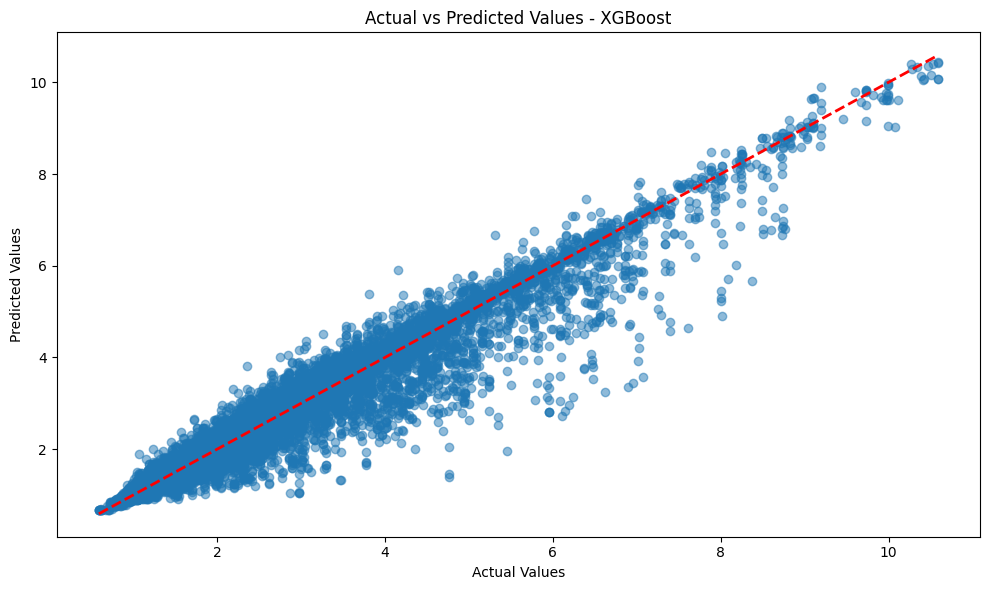

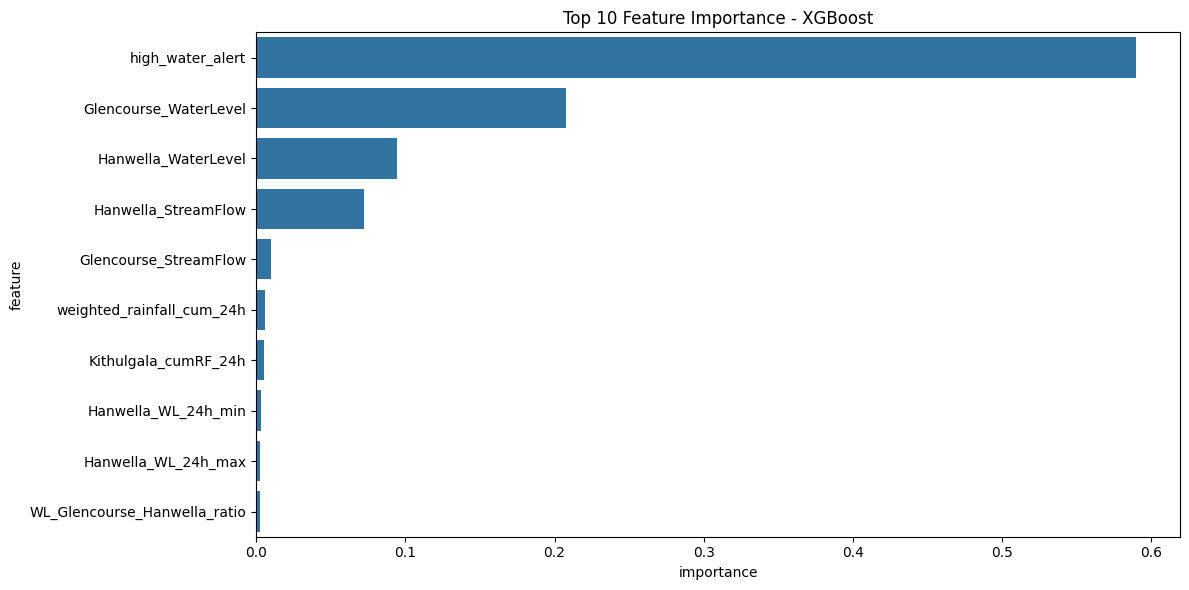

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# First, split the data
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Define models with controlled parameters
models = {
    'Random Forest': RandomForestRegressor(
        n_estimators=500,
        max_depth=10,
        min_samples_split=2,
        min_samples_leaf=2,
        max_features='None',
        random_state=42
    ),

    'XGBoost': X(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        random_state=42
    )
}

# Enhanced evaluation function
def evaluate_model(y_true, y_pred, train_score, cv_scores):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    test_r2 = r2_score(y_true, y_pred)

    return {
        'RMSE': rmse,
        'MAE': mae,
        'Train R²': train_score,
        'Test R²': test_r2,
        'CV R² Mean': cv_scores.mean(),
        'CV R² Std': cv_scores.std()
    }


# Compare all models
results = []
cv_scores = {}

# Define cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\nEvaluating {name}...")

    # Perform cross-validation
    cv_score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    cv_scores[name] = cv_score

    # Fit model
    model.fit(X_train, y_train)

    # Get training score
    train_score = model.score(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate
    result = evaluate_model(y_test, y_pred, train_score, cv_score)
    results.append({'Model': name, **result})

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.set_index('Model')

# Print detailed results
print("\nDetailed Model Comparison:")
print(results_df.round(3))

# Visualize cross-validation results
plt.figure(figsize=(12, 6))
plt.boxplot([cv_scores[name] for name in cv_scores.keys()], labels=cv_scores.keys())
plt.title('Cross-validation Scores Comparison')
plt.xticks(rotation=45)
plt.ylabel('R² Score')
plt.tight_layout()
plt.show()

# Find best model based on CV R² Mean
best_model_name = results_df['CV R² Mean'].idxmax()
best_model = models[best_model_name]

print(f"\nBest performing model: {best_model_name}")

# Plot actual vs predicted for best model
plt.figure(figsize=(10, 6))
y_pred_best = best_model.predict(X_test)
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values - {best_model_name}')
plt.tight_layout()
plt.show()

# If best model is tree-based, show feature importance
if hasattr(best_model, 'feature_importances_'):
    # Get feature importance
    importances = pd.DataFrame({
        'feature': X_final.columns,
        'importance': best_model.feature_importances_
    })
    importances = importances.sort_values('importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=importances.head(10))
    plt.title(f'Top 10 Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()


# Model Overfitting Analysis

In [13]:
models = {
    'Random Forest': RandomForestRegressor(
        n_estimators=300,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        n_jobs=-1,
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        min_samples_split=5,
        random_state=42
    ),
    'XGBoost': X(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        random_state=42
    )
}

# Fit the models before calculating scores
for name, model in models.items():
    model.fit(X_train, y_train)  # Fit the model here

for name, model in models.items():
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"\n{name}:")
    print(f"Training R²: {train_score:.3f}")
    print(f"Testing R²: {test_score:.3f}")
    print(f"Difference: {(train_score - test_score):.3f}")


Random Forest:
Training R²: 0.936
Testing R²: 0.926
Difference: 0.010

Gradient Boosting:
Training R²: 0.944
Testing R²: 0.935
Difference: 0.009

XGBoost:
Training R²: 0.957
Testing R²: 0.946
Difference: 0.011


# **Training Final Models**


Evaluating Random Forest...

Evaluating XGBoost...

Final Model Performance Metrics:
               Train R²  Test R²   RMSE    MAE  CV R² Mean  CV R² Std
Model                                                                
Random Forest     0.948    0.937  0.385  0.216       0.933      0.001
XGBoost           0.973    0.961  0.304  0.176       0.958      0.001


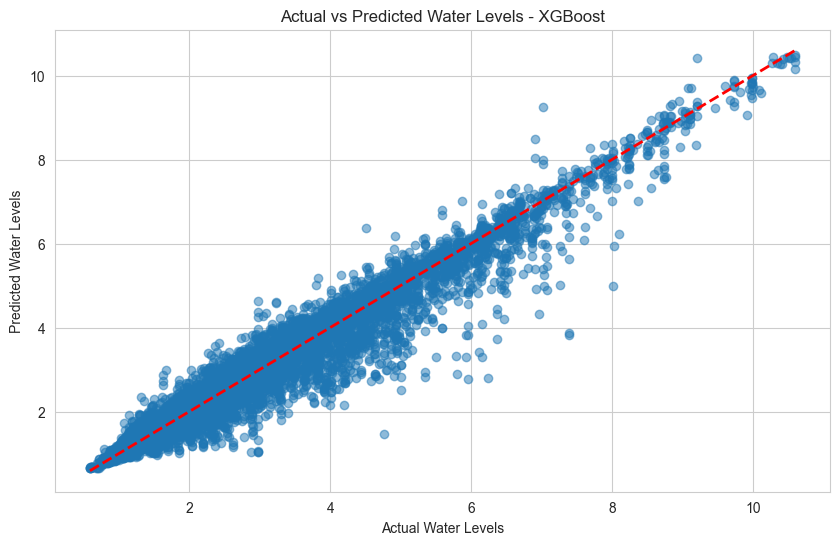

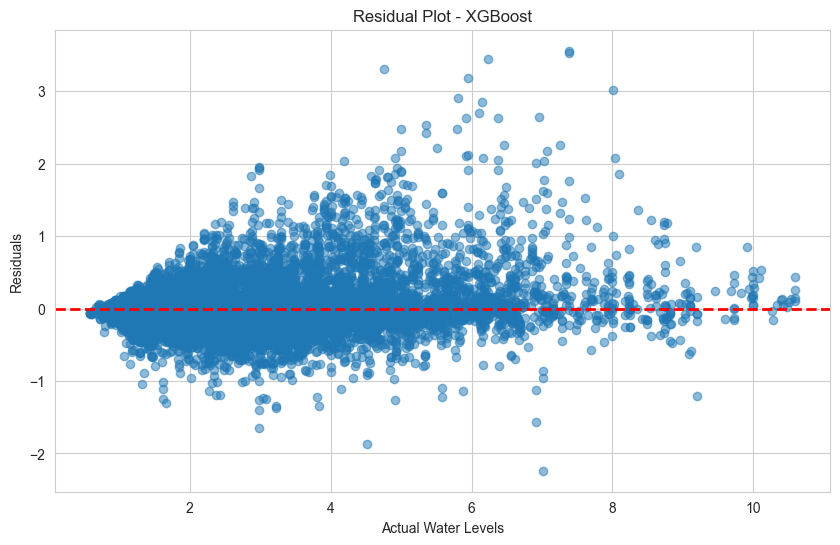

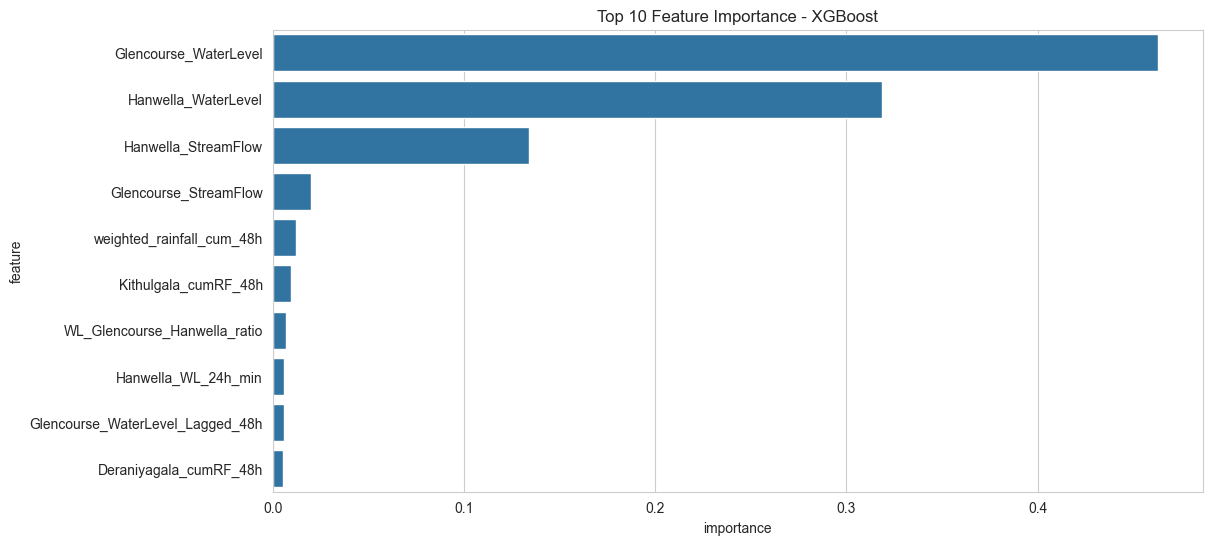


Insights and Practical Use:
- Best performing model: XGBoost
- The models provide predictions for flood risk in the Kelani River Basin.
- The best-performing model may be useful for early flood warnings.
- Further analysis on extreme weather events can improve accuracy.


In [13]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Define models with best parameters
models = {
    'Random Forest': RandomForestRegressor(
        n_estimators=500,
        max_depth=10,
        min_samples_split=2,
        min_samples_leaf=2,
        max_features=None,
        random_state=42
    ),
    'XGBoost': XGBRegressor(
        subsample=0.9,
        n_estimators=300,
        max_depth=5,
        learning_rate=0.2,
        gamma=0.1,
        colsample_bytree=1.0,
        random_state=42
    )
}

# Evaluation function
def evaluate_model(y_true, y_pred, train_score, cv_scores):
    """
    Comprehensive model evaluation metrics

    Args:
    - y_true: Actual target values
    - y_pred: Predicted values
    - train_score: R² score on training data
    - cv_scores: Cross-validation scores

    Returns:
    - Dictionary of performance metrics
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    test_r2 = r2_score(y_true, y_pred)

    return {
        'Train R²': train_score,
        'Test R²': test_r2,
        'RMSE': rmse,
        'MAE': mae,
        'CV R² Mean': cv_scores.mean(),
        'CV R² Std': cv_scores.std()
    }

# Compare models
def compare_models():
    # Store results
    results = []
    trained_models = {}

    # Cross-validation setup
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    for name, model in models.items():
        print(f"\nEvaluating {name}...")

        # Cross-validation
        cv_score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')

        # Fit model
        model.fit(X_train, y_train)
        train_score = model.score(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Evaluate
        result = evaluate_model(y_test, y_pred, train_score, cv_score)
        results.append({'Model': name, **result})

        # Store trained model
        trained_models[name] = model

    # Convert to DataFrame
    results_df = pd.DataFrame(results).set_index('Model')
    print("\nFinal Model Performance Metrics:")
    print(results_df.round(3))

    # Identify best model
    best_model_name = results_df['CV R² Mean'].idxmax()
    best_model = trained_models[best_model_name]
    y_pred_best = best_model.predict(X_test)

    # Visualizations
    # Actual vs Predicted Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_best, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Water Levels')
    plt.ylabel('Predicted Water Levels')
    plt.title(f'Actual vs Predicted Water Levels - {best_model_name}')
    plt.show()

    # Residual Plot
    residuals = y_test - y_pred_best
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, residuals, alpha=0.5)
    plt.axhline(0, color='r', linestyle='dashed', linewidth=2)
    plt.xlabel('Actual Water Levels')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot - {best_model_name}')
    plt.show()

    # Feature Importance for best model
    if hasattr(best_model, 'feature_importances_'):
        importances = pd.DataFrame({
            'feature': X_final.columns,
            'importance': best_model.feature_importances_
        }).sort_values('importance', ascending=False)

        plt.figure(figsize=(12, 6))
        sns.barplot(x='importance', y='feature', data=importances.head(10))
        plt.title(f'Top 10 Feature Importance - {best_model_name}')
        plt.show()

    # Insights
    print("\nInsights and Practical Use:")
    print(f"- Best performing model: {best_model_name}")
    print("- The models provide predictions for flood risk in the Kelani River Basin.")
    print("- The best-performing model may be useful for early flood warnings.")
    print("- Further analysis on extreme weather events can improve accuracy.")

    return results_df, best_model

# Run the analysis
results_df, best_model = compare_models()

# Saving The Models

In [16]:
import joblib

# Train the models
rf_model, gb_model, xgb_model = train_final_models(X_final, y)

# Save the models
joblib.dump(rf_model, 'random_forest_model.joblib')
joblib.dump(gb_model, 'gradient_boosting_model.joblib')
joblib.dump(xgb_model, 'xgboost_model.joblib')

# Save the feature names
joblib.dump(list(X_final.columns), 'feature_names.joblib')


['feature_names.joblib']

Prediction Function

In [ ]:
def make_prediction(input_data, models):
    """
    Make predictions using all models and return their average

    Parameters:
    input_data: pd.DataFrame - Input features
    models: list - List of trained models

    Returns:
    float - Average prediction from all models
    dict - Individual model predictions
    """
    predictions = {}

    for model, name in zip(models, ['Random Forest', 'Gradient Boosting', 'XGBoost']):
        pred = model.predict(input_data)
        predictions[name] = pred

    # Calculate ensemble prediction (average of all models)
    ensemble_pred = np.mean([pred for pred in predictions.values()], axis=0)

    return ensemble_pred, predictions
